In [21]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# 整理成 DataFrame
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

columns = [
    "CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO",
    "B","LSTAT"
]
boston = pd.DataFrame(data, columns=columns)
boston["MEDV"] = target



In [22]:
print(boston.shape) 
boston.head()        


(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


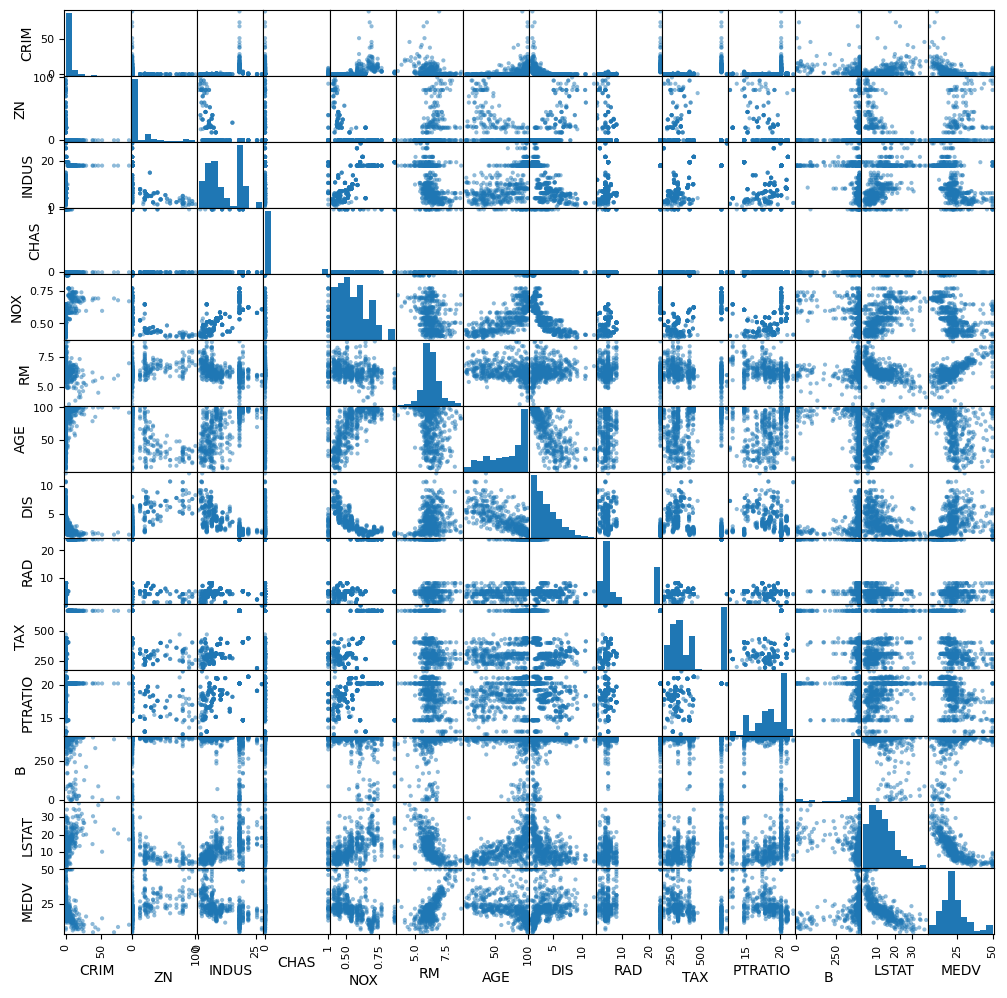

In [23]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(boston, figsize=(12,12))
plt.show()


In [24]:
boston.corr()['CRIM'].sort_values()


MEDV      -0.388305
B         -0.385064
DIS       -0.379670
RM        -0.219247
ZN        -0.200469
CHAS      -0.055892
PTRATIO    0.289946
AGE        0.352734
INDUS      0.406583
NOX        0.420972
LSTAT      0.455621
TAX        0.582764
RAD        0.625505
CRIM       1.000000
Name: CRIM, dtype: float64

In [25]:
print("Max CRIM:", boston['CRIM'].max())
print("Max TAX:", boston['TAX'].max())
print("Max PTRATIO:", boston['PTRATIO'].max())


Max CRIM: 88.9762
Max TAX: 711.0
Max PTRATIO: 22.0


In [26]:
boston['CHAS'].sum()  


np.float64(35.0)

In [27]:
boston['PTRATIO'].median()


19.05

In [28]:
lowest_medv_idx = boston['MEDV'].idxmin()
boston.loc[lowest_medv_idx]


CRIM        38.3518
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.6930
RM           5.4530
AGE        100.0000
DIS          1.4896
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B          396.9000
LSTAT       30.5900
MEDV         5.0000
Name: 398, dtype: float64

In [29]:
print("Suburbs with RM > 7:", (boston['RM'] > 7).sum())
print("Suburbs with RM > 8:", (boston['RM'] > 8).sum())


Suburbs with RM > 7: 64
Suburbs with RM > 8: 13
